<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [2]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,nan
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,...,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,nan,0.00,nan,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,nan,0.00,nan,nan
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,...,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,nan,0.00,nan,289.00


In [3]:
!pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 2.4 MB/s eta 0:00:01


In [4]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,...,13.83,nan,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,nan
23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,nan,5.00,38.00,4,NaN,...,8.50,nan,Тосно,nan,nan,nan,nan,nan,nan,45.00
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,nan,3.00,29.70,1,NaN,...,nan,nan,село Рождествено,nan,nan,nan,nan,nan,nan,nan
23697,13,11475000.00,76.75,2017-03-28T00:00:00,2,3.00,17.00,nan,12,NaN,...,23.30,2.00,Санкт-Петербург,39140.00,10364.00,2.00,173.00,3.00,196.00,602.00
23698,4,1350000.00,32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,...,9.00,nan,поселок Новый Учхоз,nan,nan,nan,nan,nan,nan,nan


In [5]:
df.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1071,20,16218000.00,95.80,2019-04-12T00:00:00,3,nan,5.00,68.10,2,NaN,...,14.40,nan,Санкт-Петербург,21411.00,1141.00,3.00,110.00,3.00,187.00,nan


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.00,9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,23699.00,6541548.77,10887013.27,12190.00,3400000.00,4650000.00,6800000.00,763000000.00
total_area,23699.00,60.35,35.65,12.00,40.00,52.00,69.90,900.00
rooms,23699.00,2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,14504.00,2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,23613.00,10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,21796.00,34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,23699.00,5.89,4.89,1.00,2.00,4.00,8.00,33.00
kitchen_area,21421.00,10.57,5.91,1.30,7.00,9.10,12.00,112.00
balcony,12180.00,1.15,1.07,0.00,0.00,1.00,2.00,5.00


In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Нам предоставленна таблица с данными продажей квартир. По первоночалному осмотру данных нам нужно выявить дефекты в столцах,где понадобиться убрать пропуски и поменять типы данных.

## Предобработка данных

In [9]:
df['total_images'].value_counts()

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64

В этом столбце нет подозрительных значений.

In [10]:

df.loc[df['ceiling_height'] > 5, 'ceiling_height'] = 0
df.loc[df['ceiling_height'] < 2.5, 'ceiling_height'] = 0
df['ceiling_height'] = df['ceiling_height'].fillna(0)
df['ceiling_height'].value_counts()

0.00    9304
2.50    3515
2.60    1646
2.70    1574
3.00    1112
        ... 
3.42       1
4.25       1
3.88       1
4.80       1
4.65       1
Name: ceiling_height, Length: 151, dtype: int64

В столбце с высотой потолков находим много значений которые не реальны. Минимальная высота потолков по СНИП 2.5м ну а в Питерских сталинках высота 4.5м. Максимальную берем 5м. Меняем на 0. Что означает что заполнено не правильно. А правильную высоту квартиры лучшу уточнить у продавца. 

In [11]:
df['last_price'].sort_values(ascending= True).head(40)
df['last_price'].max()
df['last_price'].min()

12190.0

In [12]:
def correct_price(price):
    if price <= 100000:
        return price * 100
    if 10000 < price < 1000000:
        return price * 10
    return price 
df['last_price'] = df['last_price'].apply(correct_price)
df['last_price'] = df['last_price'].astype('int')

In [13]:
df['last_price'].sort_values(ascending= True).head()

15123    1000000
11956    1000000
13063    1000000
23486    1000000
13408    1000000
Name: last_price, dtype: int64

В столбце last_price находим очень маленькие значения. Квартира не может стоить 12т.р и 600тр в Питере и области. Минимальное восприятие для цены это от 1 мил рублей. Я воспринял это как ошибку с нулями. все что меньще 100000 добовляем 00. Все что меньше 1млн. добовляем 0.

In [14]:
print(df['total_area'].min())
print(df['total_area'].max())


12.0
900.0


Нашли максимальное и минимальное значение площади квартиры. В нашем мире возможно все!

In [15]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [16]:
df['floors_total'] = df['floors_total'].fillna(0)
df['floors_total'] = df['floors_total'].astype('int8')
df['floors_total'].value_counts()

5     5788
9     3761
16    1376
12    1362
4     1200
10    1174
25    1075
6      914
17     833
3      668
7      592
14     553
18     505
24     469
8      390
2      383
15     365
23     352
19     339
22     286
20     271
13     229
11     203
27     164
21     158
26     124
0       86
1       25
35      24
28      21
36       3
37       1
34       1
60       1
33       1
52       1
29       1
Name: floors_total, dtype: int64

Убираем отсутствующие значения и меняем формат на целые числа.

In [17]:
df['living_area'].sort_values(ascending= True).head(10)



21758   2.00
13915   2.00
23574   3.00
3242    3.00
17582   5.00
21943   5.40
16431   6.00
19251   6.50
20994   8.00
23208   8.00
Name: living_area, dtype: float64

In [18]:
df['living_area'] = df['living_area'].fillna(0)
df = df[df["living_area"] >= 6]
df['living_area'].sort_values(ascending= True).head(10)

16431   6.00
19251   6.50
23208   8.00
20994   8.00
114     8.30
2309    8.40
21505   8.50
17248   8.90
22252   9.00
7312    9.00
Name: living_area, dtype: float64

Убираем строки с жилой площадью меньше 6 м.кв. Для всей территории РФ размер минимальной жилплощади установлен в размере 6 кв. м.

In [19]:
df['total_images'] = df['total_images'].astype('int8')
df['rooms'] = df['rooms'].astype('int8')
df['floor'] = df['floor'].astype('int8')

In [20]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('int8')
df['balcony'].value_counts()

0    13690
1     4056
2     3510
5      283
4      176
3       75
Name: balcony, dtype: int64

Меняем пропуски на 0, так как есть и то и другое.

In [21]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].astype('int8')
df['parks_around3000'].value_counts()


0    14295
1     5274
2     1628
3      593
Name: parks_around3000, dtype: int64

In [22]:
df['days_exposition'] = df['days_exposition'].fillna(0)
df['days_exposition'] = df['days_exposition'].astype('int')
df['days_exposition'].value_counts()


0       2983
45       546
60       350
7        213
30       204
        ... 
999        1
1015       1
1047       1
1111       1
1175       1
Name: days_exposition, Length: 1122, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21790 entries, 0 to 23698
Data columns (total 22 columns):
total_images            21790 non-null int8
last_price              21790 non-null int64
total_area              21790 non-null float64
first_day_exposition    21790 non-null object
rooms                   21790 non-null int8
ceiling_height          21790 non-null float64
floors_total            21790 non-null int8
living_area             21790 non-null float64
floor                   21790 non-null int8
is_apartment            2655 non-null object
studio                  21790 non-null bool
open_plan               21790 non-null bool
kitchen_area            20978 non-null float64
balcony                 21790 non-null int8
locality_name           21746 non-null object
airports_nearest        16874 non-null float64
cityCenters_nearest     16895 non-null float64
parks_around3000        21790 non-null int8
parks_nearest           7499 non-null float64
ponds_around3000        16896

In [24]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [25]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.00,16028.00,1,482.00,2.00,755.00,0
1,7,3350000,40.40,2018-12-04T00:00:00,1,0.00,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.00,18603.00,0,nan,0.00,nan,81
2,10,5196000,56.00,2015-08-20T00:00:00,2,0.00,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.00,13933.00,1,90.00,2.00,574.00,558
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.00,8098.00,2,112.00,1.00,48.00,121
5,10,2890000,30.40,2018-09-10T00:00:00,1,0.00,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,nan,nan,0,nan,nan,nan,55


In [26]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)

In [27]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              44
airports_nearest         4916
cityCenters_nearest      4895
parks_around3000            0
parks_nearest           14291
ponds_around3000         4894
ponds_nearest           13378
days_exposition             0
dtype: int64

## Расчёты и добавление результатов в таблицу

In [28]:
df['price_living_area'] = df['last_price'] / df['living_area']
df['price_living_area'] = df['price_living_area'].astype('int')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_living_area
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,0,Санкт-Петербург,18863.00,16028.00,1,482.00,2.00,755.00,0,254901
1,7,3350000,40.40,2018-12-04T00:00:00,1,0.00,11,18.60,1,False,...,2,посёлок Шушары,12817.00,18603.00,0,nan,0.00,nan,81,180107
2,10,5196000,56.00,2015-08-20T00:00:00,2,0.00,5,34.30,4,False,...,0,Санкт-Петербург,21741.00,13933.00,1,90.00,2.00,574.00,558,151486
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,0,Санкт-Петербург,31856.00,8098.00,2,112.00,1.00,48.00,121,312500
5,10,2890000,30.40,2018-09-10T00:00:00,1,0.00,12,14.40,5,False,...,0,городской посёлок Янино-1,nan,nan,0,nan,nan,nan,55,200694


In [29]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
df['day_of_week'] = df['first_day_exposition'].dt.day_name()
df['month'] = df['first_day_exposition'].dt.month_name()
df['year'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_living_area,day_of_week,month,year
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,16028.00,1,482.00,2.00,755.00,0,254901,Thursday,March,2019
1,7,3350000,40.40,2018-12-04,1,0.00,11,18.60,1,False,...,18603.00,0,nan,0.00,nan,81,180107,Tuesday,December,2018
2,10,5196000,56.00,2015-08-20,2,0.00,5,34.30,4,False,...,13933.00,1,90.00,2.00,574.00,558,151486,Thursday,August,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,8098.00,2,112.00,1.00,48.00,121,312500,Tuesday,June,2018
5,10,2890000,30.40,2018-09-10,1,0.00,12,14.40,5,False,...,nan,0,nan,nan,nan,55,200694,Monday,September,2018


In [30]:
def floor_df(row):
    floors_group = row['floor']
    floors_total_group = row['floors_total']
    
    if floors_group == floors_total_group:
        return 'последний этаж'
    if floors_group == 1:
        return 'первый этаж'
    if floors_group > 1:
        if floors_group < floors_total_group:
            return 'другой'
    if floors_group < 1:
        return 'не указан этаж'    
        

df['which_floor'] = df.apply(floor_df, axis =1)
print(df['which_floor'].value_counts())
df.head()

другой            15994
последний этаж     3101
первый этаж        2643
Name: which_floor, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_living_area,day_of_week,month,year,which_floor
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,1,482.00,2.00,755.00,0,254901,Thursday,March,2019,другой
1,7,3350000,40.40,2018-12-04,1,0.00,11,18.60,1,False,...,0,nan,0.00,nan,81,180107,Tuesday,December,2018,первый этаж
2,10,5196000,56.00,2015-08-20,2,0.00,5,34.30,4,False,...,1,90.00,2.00,574.00,558,151486,Thursday,August,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,2,112.00,1.00,48.00,121,312500,Tuesday,June,2018,другой
5,10,2890000,30.40,2018-09-10,1,0.00,12,14.40,5,False,...,0,nan,nan,nan,55,200694,Monday,September,2018,другой


<div class="alert alert-block alert-success">
<b>Success:</b> отличная функция!

In [31]:
df['square_living_total'] = df['living_area'] / df['total_area']
df['square_kitchen_total'] = df['kitchen_area'] / df['total_area'] 
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_living_area,day_of_week,month,year,which_floor,square_living_total,square_kitchen_total
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2.00,755.00,0,254901,Thursday,March,2019,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,0.00,11,18.60,1,False,...,0.00,nan,81,180107,Tuesday,December,2018,первый этаж,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,0.00,5,34.30,4,False,...,2.00,574.00,558,151486,Thursday,August,2015,другой,0.61,0.15
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1.00,48.00,121,312500,Tuesday,June,2018,другой,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,0.00,12,14.40,5,False,...,nan,nan,55,200694,Monday,September,2018,другой,0.47,0.30


## Исследовательский анализ данных

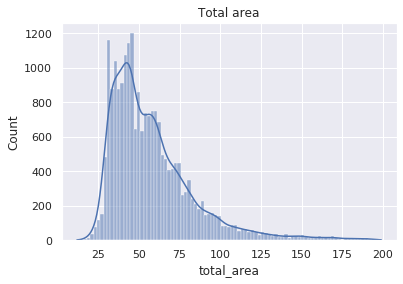

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

#df['total_area'].hist(bins = 1000)
total = df.query('total_area < 200')
#total['total_area'].hist(bins = 100)

#sns.histplot(data =total, x = 'total_area', hist=True, kde=False, rug=False )


sns.set(style="darkgrid")
sns

sns.histplot(data=total, x="total_area", kde=True)
plt.title('Total area')
plt.show()


In [33]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_living_area,day_of_week,month,year,which_floor,square_living_total,square_kitchen_total
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2.00,755.00,0,254901,Thursday,March,2019,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,0.00,11,18.60,1,False,...,0.00,nan,81,180107,Tuesday,December,2018,первый этаж,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,0.00,5,34.30,4,False,...,2.00,574.00,558,151486,Thursday,August,2015,другой,0.61,0.15
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1.00,48.00,121,312500,Tuesday,June,2018,другой,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,0.00,12,14.40,5,False,...,nan,nan,55,200694,Monday,September,2018,другой,0.47,0.30


Самая популярная жилая площядь применрно от 27 до 75 м2

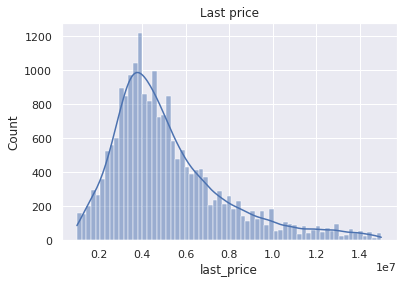

In [34]:
#df['last_price'].hist(bins = 1000)
total1 = df.query('last_price < 15000000')
#total1['last_price'].hist(bins = 100)

sns.histplot(data=total1, x="last_price",kde=True)
plt.title('Last price')
plt.show()

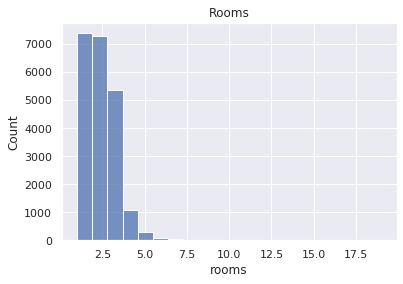

In [118]:
total2 = df.query('rooms > 0')
sns.histplot(data=total2, x="rooms", bins = 20)
plt.title('Rooms')
plt.show()

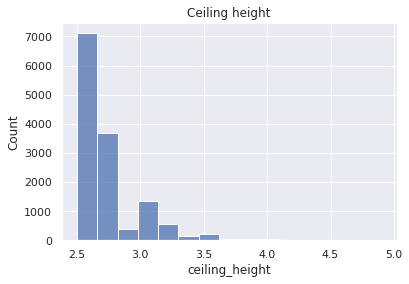

In [41]:
#df['ceiling_height'].hist(bins = 30)
total3 = df.query('ceiling_height > 0') # убираем нулевые значения, считаем что 0 = не указанное значение
#total3['ceiling_height'].hist(bins = 50, range = (2, 5))
sns.histplot(data=total3, x="ceiling_height",bins = 15)
plt.title('Ceiling height')
plt.show()

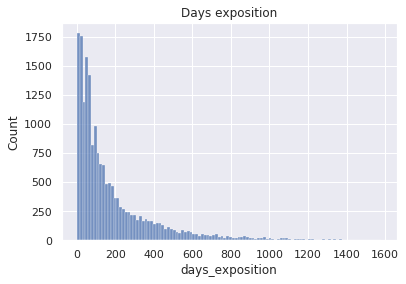

In [42]:
#df['days_exposition'].hist(bins = 30)
total4 = df.query('days_exposition > 0')
#total4['days_exposition'].hist(bins = 100)
#print('Среднее значение:' ,total4['days_exposition'].mean())
#print('Медианное значение значение:' ,total4['days_exposition'].median())

sns.histplot(data=total4, x="days_exposition")
plt.title('Days exposition')
plt.show()

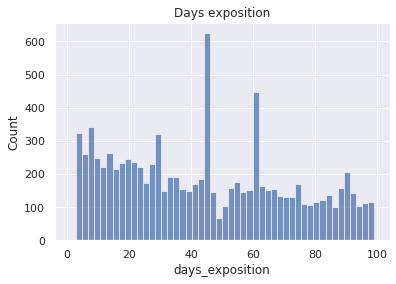

In [45]:
total5 = df.query('100 > days_exposition > 0')
sns.histplot(data=total5, x="days_exposition", bins = 50)
plt.title('Days exposition')
plt.show()

Среднее значение равняется 184 дням. 
Считаю что быстрая продажа это в районе от 1 до 90 дней. Самое большое количество продаж на 45й и 60й день.
От 90 до 200 это средняя продолжительность.
Больше 200 дней это долгий срок.


Text(0.5, 1, 'Last price * total area')

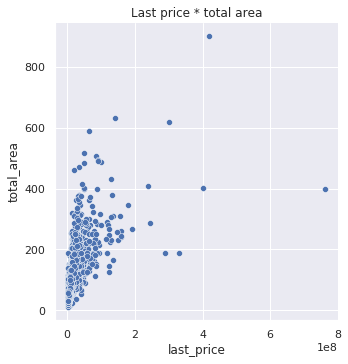

In [50]:
#df.plot(x= 'last_price', y = 'total_area', kind = 'scatter')
sns.relplot(x="last_price", y="total_area", data=df)
plt.title('Last price * total area')

Чем больше площадь, тем больше цена.

Text(0.5, 1, 'Last price * rooms')

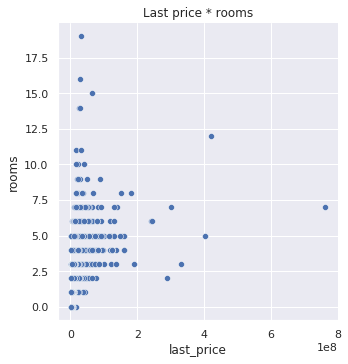

In [53]:
#df.plot(x= 'last_price', y = 'rooms', kind = 'scatter')
sns.relplot(x="last_price", y="rooms", data=df)
plt.title('Last price * rooms')

В зависимотси от колличества комнат, цена возрастает.

Text(0.5, 1, 'Last price * city Centers nearest')

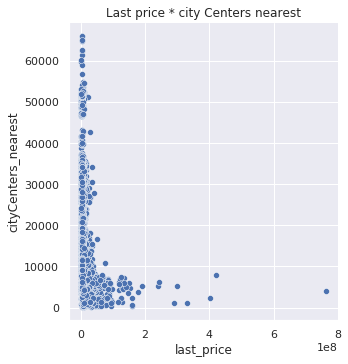

In [55]:
#df.plot(x= 'last_price', y = 'cityCenters_nearest', kind = 'scatter')
sns.relplot(x="last_price", y="cityCenters_nearest", data=df)
plt.title('Last price * city Centers nearest')

Чем ближе к центру тем дороже.

1.00    15994
2.00     3101
0.00     2643
Name: which_floor012, dtype: int64


Text(0.5, 1, 'Last price * which floor')

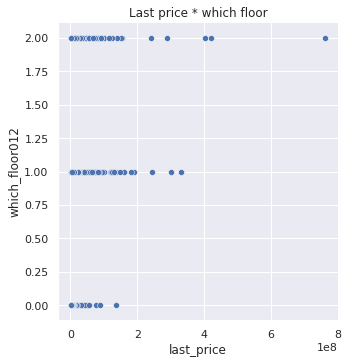

In [57]:

def floor_df_012(row):
    floors_group012 = row['which_floor']
    
    
    if floors_group012 == 'последний этаж':
        return 2
    if floors_group012 == 'первый этаж':
        return 0
    if floors_group012 == 'другой':
        return 1
       
        

df['which_floor012'] = df.apply(floor_df_012, axis =1)
print(df['which_floor012'].value_counts())
df.head()

#df.plot(x= 'last_price', y = 'which_floor012', kind = 'scatter')

sns.relplot(x="last_price", y="which_floor012", data=df)
plt.title('Last price * which floor')

На первом этаже самые низкие цены. Другие этажи цены высокие. На последнем этаже бывают самые дорогие квартиры.

4    3974
2    3893
5    3680
3    3642
1    3352
6    1730
7    1519
Name: day_of_week12, dtype: int64


Text(0.5, 1, 'Last price * day_of_week')

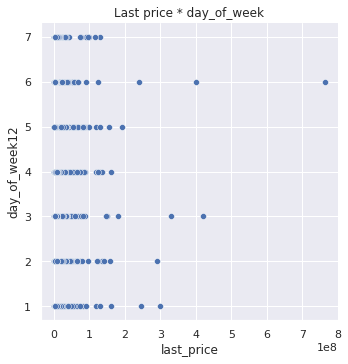

In [58]:
#df['day_of_week'] = df['day_of_week'].astype('int')
#df.plot(x= 'last_price', y = 'day_of_week', kind = 'scatter')

#station_stat_multi = df.pivot_table( columns = 'last_price',
    #values=['rooms', 'cityCenters_nearest', 'which_floor012']
#)
#print(good_station_stat)
#pd.plotting.scatter_matrix(station_stat_multi, figsize = (9, 9))

def day_of_weeks(row):
    day_of_weeks1 = row['day_of_week']
    
    
    if day_of_weeks1 == 'Monday':
        return 1
    if day_of_weeks1 == 'Tuesday':
        return 2
    if day_of_weeks1 == 'Wednesday':
        return 3
    if day_of_weeks1 == 'Thursday':
        return 4
    if day_of_weeks1 == 'Friday':
        return 5
    if day_of_weeks1 == 'Saturday':
        return 6
    if day_of_weeks1 == 'Sunday':
        return 7
    
df['day_of_week12'] = df.apply(day_of_weeks, axis =1)
print(df['day_of_week12'].value_counts())

#df.plot(x= 'last_price', y = 'day_of_week12', kind = 'scatter')

sns.relplot(x="last_price", y="day_of_week12", data=df)
plt.title('Last price * day_of_week')

In [95]:
df10 = df['locality_name'].value_counts().head(10)
df

Санкт-Петербург      14576
посёлок Мурино         460
посёлок Шушары         404
Всеволожск             371
Пушкин                 345
Колпино                328
посёлок Парголово      301
Гатчина                292
деревня Кудрово        262
Петергоф               197
Name: locality_name, dtype: int64

In [94]:

df10 = df.pivot_table(index = 'locality_name', values = 'price_living_area', aggfunc = ['mean', 'count'])
df10.columns = ['price_living_area', 'count']
df10 = df10.sort_values(by = 'count', ascending = False).head(10)
df10

,price_living_area,count
locality_name,,
Санкт-Петербург,213202.57,14576
посёлок Мурино,175242.22,460
посёлок Шушары,156336.94,404
Всеволожск,133544.57,371
Пушкин,192253.68,345
Колпино,132022.64,328
посёлок Парголово,200717.76,301
Гатчина,123844.16,292
деревня Кудрово,188186.61,262


In [ ]:
#df.loc[df['locality_name'] == 'Санкт-Петербург', 'price_living_area'].mean()

In [ ]:
#df.loc[df['locality_name'] == 'посёлок Мурино', 'price_living_area'].mean()

In [ ]:
#df.loc[df['locality_name'] == 'посёлок Шушары', 'price_living_area'].mean()

In [ ]:
#df.loc[df['locality_name'] == 'Всеволожск', 'price_living_area'].mean()

In [ ]:
#df.loc[df['locality_name'] == 'Пушкин', 'price_living_area'].mean()

In [ ]:
#df.loc[df['locality_name'] == 'Колпино', 'price_living_area'].mean()

In [ ]:
#df.loc[df['locality_name'] == 'посёлок Парголово', 'price_living_area'].mean()

In [ ]:
#df.loc[df['locality_name'] == 'Гатчина', 'price_living_area'].mean()

In [ ]:
#df.loc[df['locality_name'] == 'деревня Кудрово', 'price_living_area'].mean()

In [ ]:
#df.loc[df['locality_name'] == 'Петергоф', 'price_living_area'].mean()

Самая дорогая цена за кв.м в Санкт-Питербурге. Самая дешевая в Гатчине.

In [96]:

Saint_Petersburg = df.query('locality_name == "Санкт-Петербург"' )
Saint_Petersburg['cityCenters_nearest_km'] = Saint_Petersburg['cityCenters_nearest'] / 1000
Saint_Petersburg['cityCenters_nearest_km'] = Saint_Petersburg['cityCenters_nearest_km'].fillna(0)
Saint_Petersburg['cityCenters_nearest_km'] = Saint_Petersburg['cityCenters_nearest_km'].astype('int')
Saint_Petersburg.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_living_area,day_of_week,month,year,which_floor,square_living_total,square_kitchen_total,which_floor012,day_of_week12,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,254901,Thursday,March,2019,другой,0.47,0.23,1.00,4,16
2,10,5196000,56.00,2015-08-20,2,0.00,5,34.30,4,False,...,151486,Thursday,August,2015,другой,0.61,0.15,1.00,4,13
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,312500,Tuesday,June,2018,другой,0.32,0.41,1.00,2,8
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,123853,Sunday,February,2017,другой,0.71,0.11,1.00,7,15
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,248768,Thursday,November,2017,другой,0.51,0.21,1.00,4,13


In [97]:
#Saint_Petersburg['cityCenters_nearest_km'].value_counts()

last_prise_Saint_Petersburg = Saint_Petersburg.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean')
last_prise_Saint_Petersburg


,last_price
cityCenters_nearest_km,
0,20850225.73
1,19136760.71
2,16522830.41
3,13203905.06
4,13091676.33
5,14850638.51
6,13412518.45
7,13015436.28
8,8413641.27


In [98]:
df.median()

total_images                10.00
last_price             4700000.00
total_area                  52.00
rooms                        2.00
ceiling_height               2.50
floors_total                 9.00
living_area                 30.00
floor                        4.00
is_apartment                 0.00
studio                       0.00
open_plan                    0.00
kitchen_area                 9.00
balcony                      0.00
airports_nearest         26662.00
cityCenters_nearest      13109.00
parks_around3000             0.00
parks_nearest              451.00
ponds_around3000             0.00
ponds_nearest              503.00
days_exposition             78.00
price_living_area       169696.00
year                      2017.00
square_living_total          0.57
square_kitchen_total         0.17
which_floor012               1.00
day_of_week12                4.00
dtype: float64

Значительное снижение цены произошло после 7ого км. Считаем что центр это круг с радиусом 7км.

Text(0.5, 1.0, 'city Centers nearest km  * last price rub')

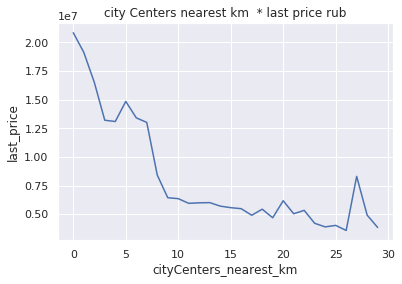

In [104]:
#last_prise_Saint_Petersburg.plot()
sns.lineplot(x="cityCenters_nearest_km", y="last_price",
             data=last_prise_Saint_Petersburg)
plt.title('city Centers nearest km  * last price rub')

In [105]:
Saint_Petersburg1 = Saint_Petersburg.query('cityCenters_nearest_km <= 7')

<div class="alert alert-block alert-success">
<b>Success:</b> соогласен с выбранным радиусом

In [106]:
Saint_Petersburg1.mean()

total_images                   10.40
last_price               14450792.85
total_area                     91.11
rooms                           2.82
ceiling_height                  2.02
floors_total                    7.17
living_area                    53.81
floor                           4.24
is_apartment                    0.00
studio                          0.00
open_plan                       0.00
kitchen_area                   13.84
balcony                         0.34
airports_nearest            24542.58
cityCenters_nearest          4669.18
parks_around3000                1.01
parks_nearest                 458.21
ponds_around3000                1.27
ponds_nearest                 465.58
days_exposition               205.83
price_living_area          264993.68
year                         2017.17
square_living_total             0.58
square_kitchen_total            0.17
which_floor012                  1.07
day_of_week12                   3.51
cityCenters_nearest_km          4.12
d

In [107]:
Saint_Petersburg1.median()

total_images                  10.00
last_price               8990000.00
total_area                    77.00
rooms                          3.00
ceiling_height                 2.80
floors_total                   6.00
living_area                   45.00
floor                          4.00
is_apartment                   0.00
studio                         0.00
open_plan                      0.00
kitchen_area                  11.50
balcony                        0.00
airports_nearest           24264.00
cityCenters_nearest         4782.00
parks_around3000               1.00
parks_nearest                428.50
ponds_around3000               1.00
ponds_nearest                453.00
days_exposition              102.00
price_living_area         209725.00
year                        2017.00
square_living_total            0.60
square_kitchen_total           0.15
which_floor012                 1.00
day_of_week12                  4.00
cityCenters_nearest_km         4.00
dtype: float64

Text(0.5, 1, 'Last price * total area')

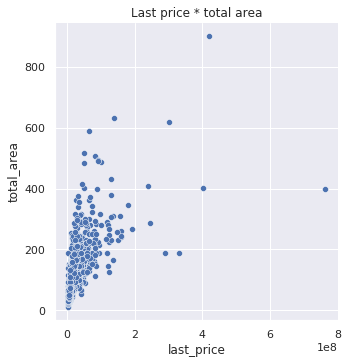

In [114]:
#Saint_Petersburg1.plot(x= 'last_price', y = 'total_area', kind = 'scatter')
sns.relplot(x="last_price", y="total_area", data=Saint_Petersburg1)
plt.title('Last price * total area')

Text(0.5, 1, 'Last price * which floor')

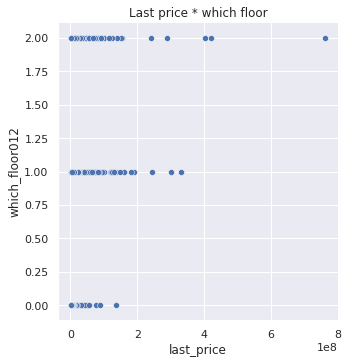

In [110]:
#Saint_Petersburg1.plot(x= 'last_price', y = 'which_floor012', kind = 'scatter')
sns.relplot(x="last_price", y="which_floor012", data=Saint_Petersburg1)
plt.title('Last price * which floor')

Text(0.5, 1, 'Last price * city Centers nearest km')

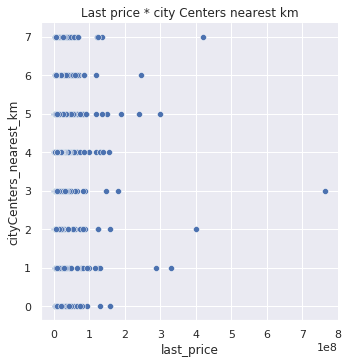

In [115]:
#Saint_Petersburg1.plot(x= 'last_price', y = 'cityCenters_nearest_km', kind = 'scatter')
sns.relplot(x="last_price", y="cityCenters_nearest_km", data=Saint_Petersburg1)
plt.title('Last price * city Centers nearest km')


## Общий вывод

Самое попклярная площадь жилого помещения составляет от 25 до 75 кв.м. Самая популярная цена на квартиру составляет 4000000 р.
Комнат в квартире чаще всего 1 ил 2, а высота потолков от 2.5 до 2.8.
Мы узнали что центр города это квартиры в радиусе 7км. Они сильно отличаются ценой от тех что дальше 7 км. В центре потолки выше, больше жилая площадь и количество комнат. Самые дешевые квартиры продаются на 1 этаже. Чем ближе к центру, тем дороже квартиры. Самые дорогие квартиры чаще всего на последних этажах. При увеличении площади, ростет цена. 